In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_excel('1645792390_cep1_dataset.xlsx')
dataset.shape

(303, 14)

In [3]:
# Viewing the dataset 
dataset.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
dataset.duplicated().sort_values()

0      False
205    False
204    False
203    False
202    False
       ...  
97     False
96     False
102    False
302    False
164     True
Length: 303, dtype: bool

In [6]:
dataset.drop_duplicates(inplace=True)
dataset.duplicated().any()

False

In [7]:
dataset.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [9]:
# Picking features based on values which are less than 10
categorical_features=[]
def filter_cat(cat):
    for i in cat:
        if dataset[i].nunique() < 20:            
            categorical_features.append(i)
filter_cat(dataset.columns)
categorical_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
dataset[categorical_features].nunique()

sex        2
cp         4
fbs        2
restecg    3
exang      2
slope      3
ca         5
thal       4
target     2
dtype: int64

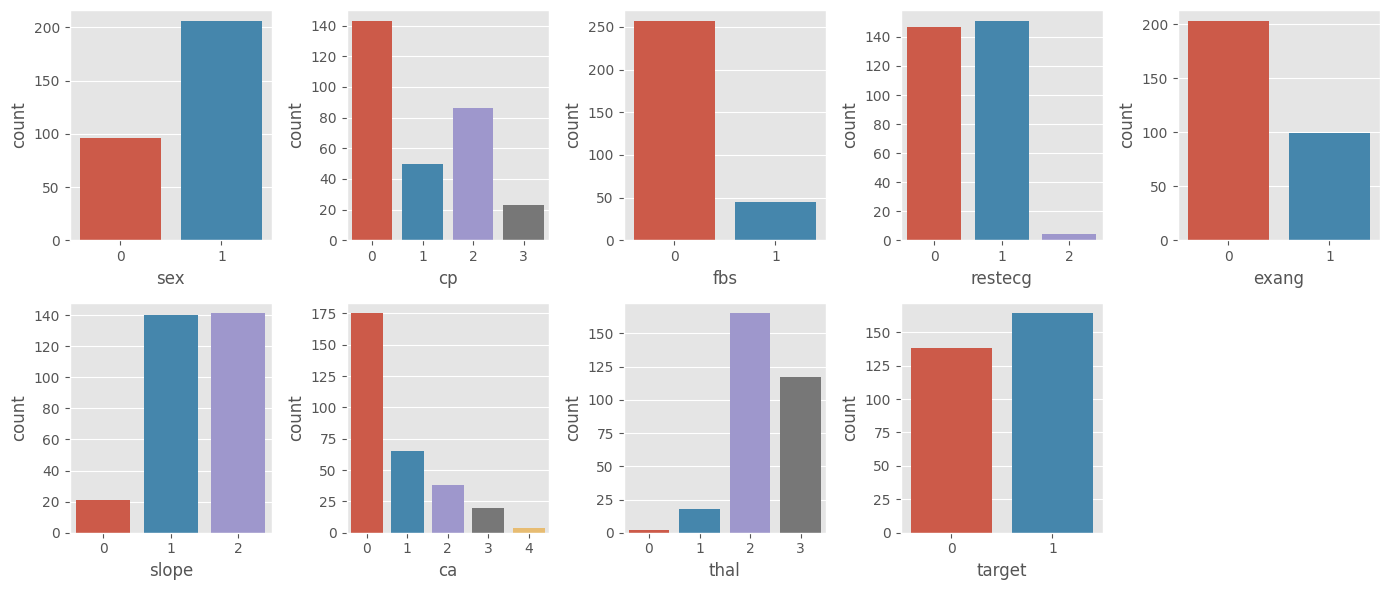

In [11]:
plt.figure(figsize=(14,6))
for i,features in enumerate(categorical_features):
    plt.subplot(2,5,i+1)
    sns.countplot(x=dataset[features])
    plt.tight_layout()

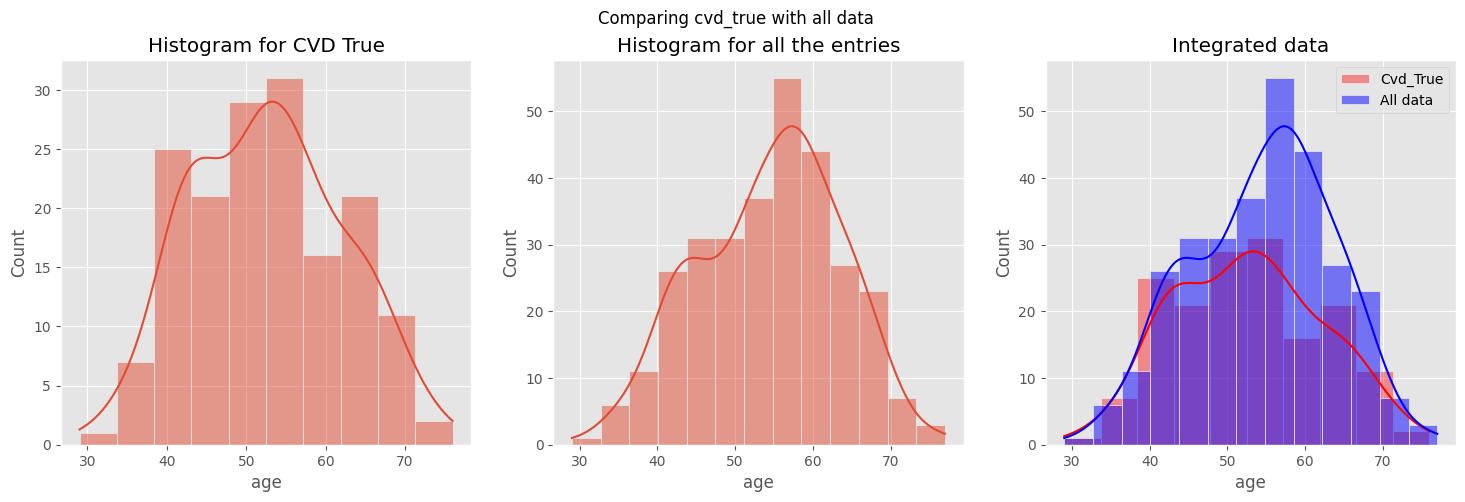

In [12]:
# Here we have data for only cvd true entries
cvd_true = dataset.loc[dataset.target == 1]

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.histplot(x=cvd_true.age,kde=True)
plt.title('Histogram for CVD True')
plt.subplot(1,3,2)
sns.histplot(x=dataset.age,kde=True)
plt.title('Histogram for all the entries')
plt.subplot(1,3,3)
sns.histplot(x=cvd_true.age,kde=True,label='Cvd_True',color='red',alpha=0.4)
sns.histplot(x=dataset.age,kde=True,label='All data',color='blue',alpha=0.5)
plt.title('Integrated data')
plt.legend()
plt.suptitle('Comparing cvd_true with all data')
plt.show()

In [13]:
# Creating a new dataframe with cvd: False
cvd_false = dataset.loc[dataset.target == 0]

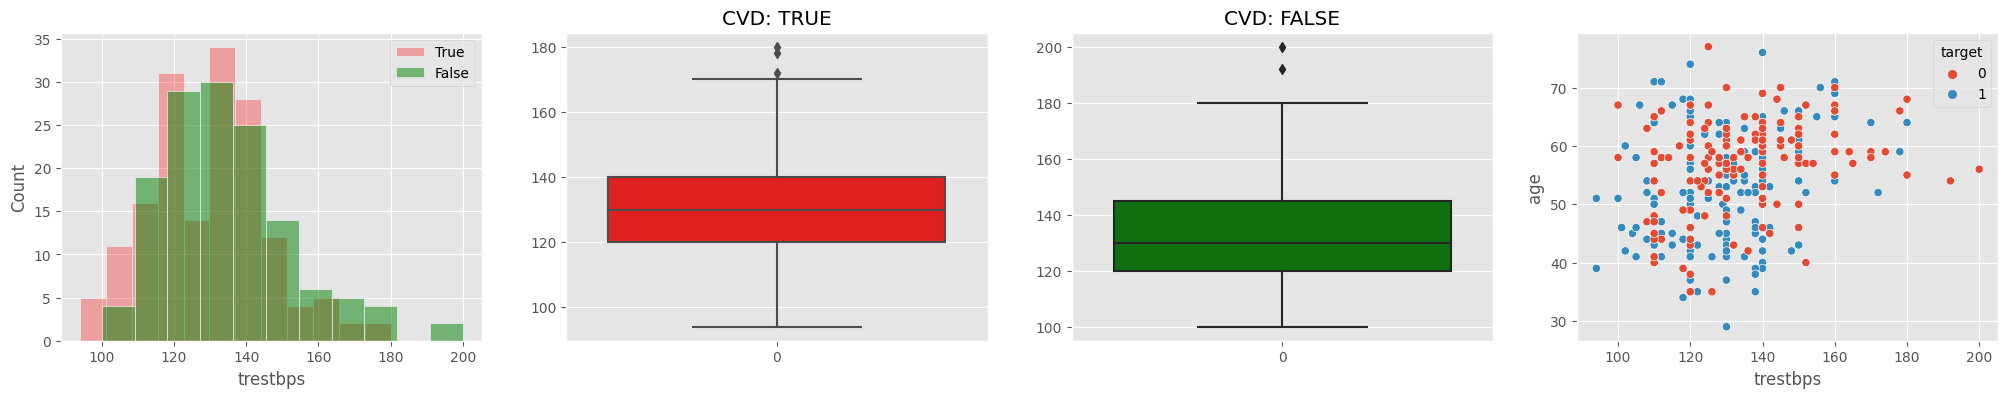

In [14]:
plt.figure(figsize=(25,4))
# PLOTTING SUBPLOT_1
plt.subplot(1,4,1)
sns.histplot(cvd_true.trestbps,color='red',alpha=0.3, label='True')
sns.histplot(cvd_false.trestbps,color='green',alpha=0.5,label='False')
plt.legend()
# PLOTTING SUBPLOT_2
plt.subplot(1,4,2)
sns.boxplot(cvd_true.trestbps,color='red')
plt.title("CVD: TRUE")

# PLOTTING SUBPLOT_3
plt.subplot(1,4,3)
sns.boxplot(cvd_false.trestbps.values,color='green')
plt.title("CVD: FALSE")

plt.subplot(1,4,4)
sns.scatterplot(y=dataset.age, x=dataset.trestbps,hue=dataset.target)
plt.show()


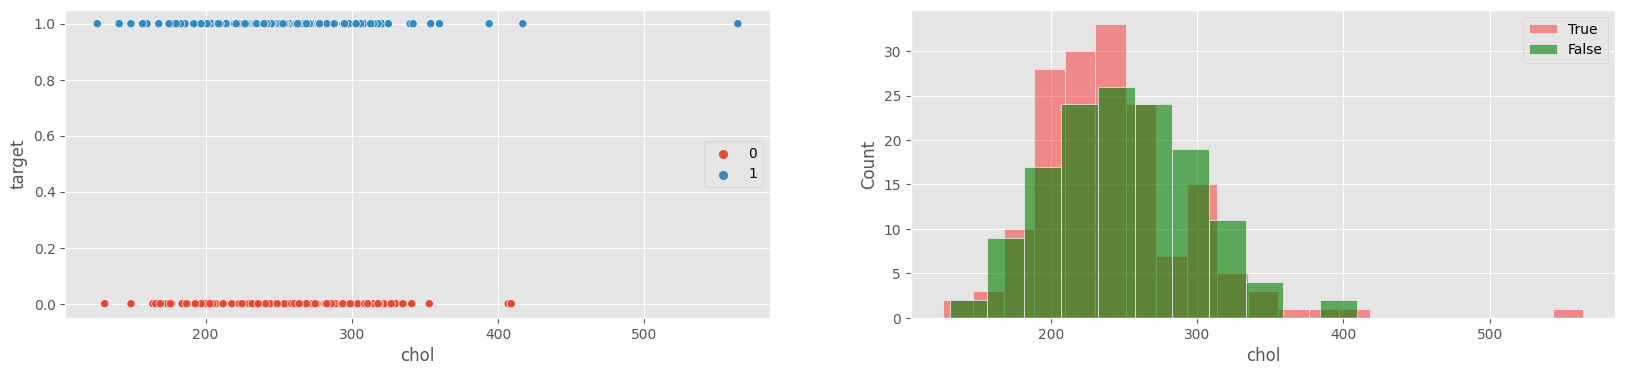

In [15]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.scatterplot(x=dataset.chol, y=dataset.target, hue=dataset.target)
plt.legend(loc='center right')

plt.subplot(122)
sns.histplot(cvd_true.chol, color='r',alpha=0.4,label='True')
sns.histplot(cvd_false.chol, color='green',alpha=0.6,label='False')
plt.legend()

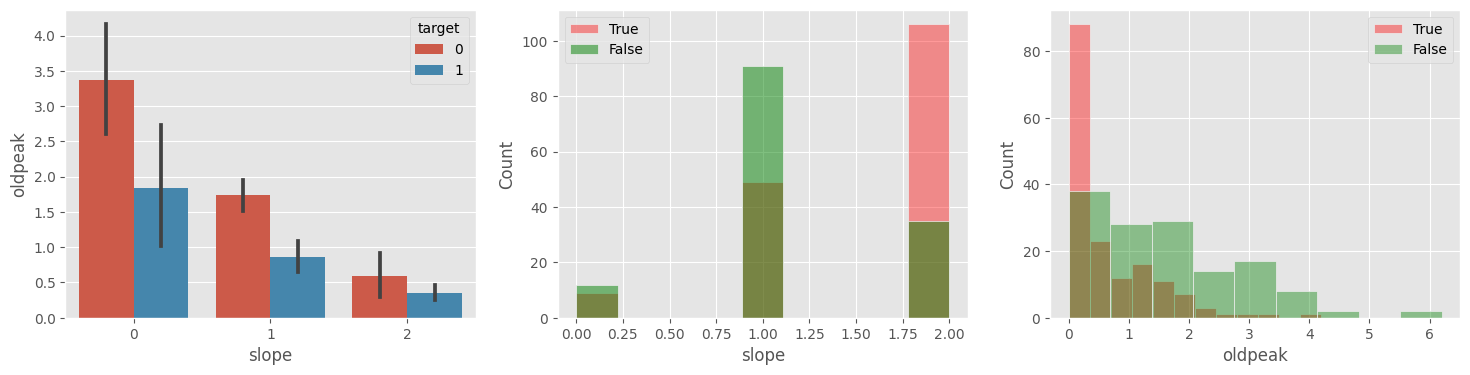

In [16]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.barplot(y=dataset.oldpeak, x=dataset.slope, hue=dataset.target)
plt.subplot(1,3,2)
sns.histplot(cvd_true.slope,color='red',alpha=0.4,label='True')
sns.histplot(cvd_false.slope,color='green',alpha=0.5,label='False')
plt.legend()
plt.subplot(1,3,3)
sns.histplot(cvd_true.oldpeak,color='red',alpha=0.4,label='True')
sns.histplot(cvd_false.oldpeak,color='green',alpha=0.4,label='False')
plt.legend()

<AxesSubplot: xlabel='thal', ylabel='count'>

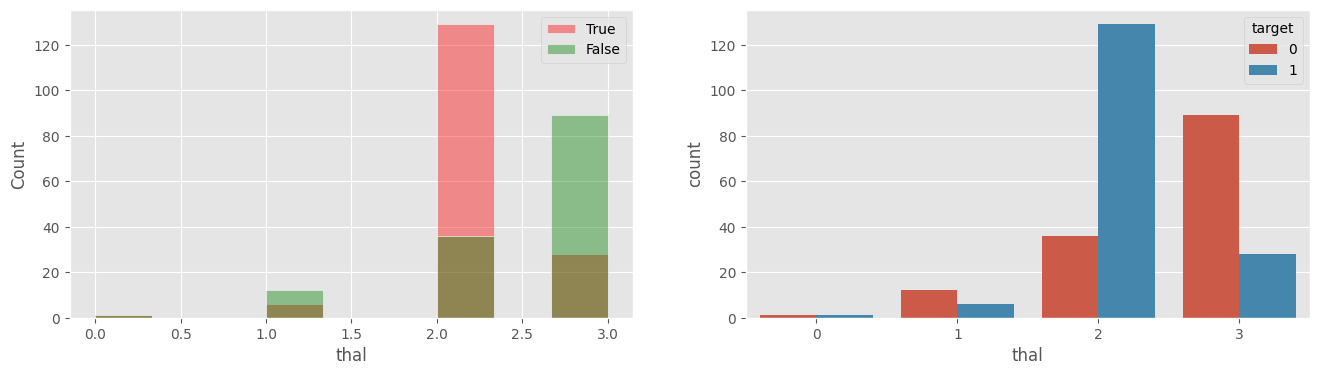

In [17]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.histplot(cvd_true.thal,color='red',alpha=0.4,label='True')
sns.histplot(cvd_false.thal,color='green',alpha=0.4,label='False')
plt.legend()
plt.subplot(1,2,2)
sns.countplot(x=dataset.thal,hue=dataset.target)

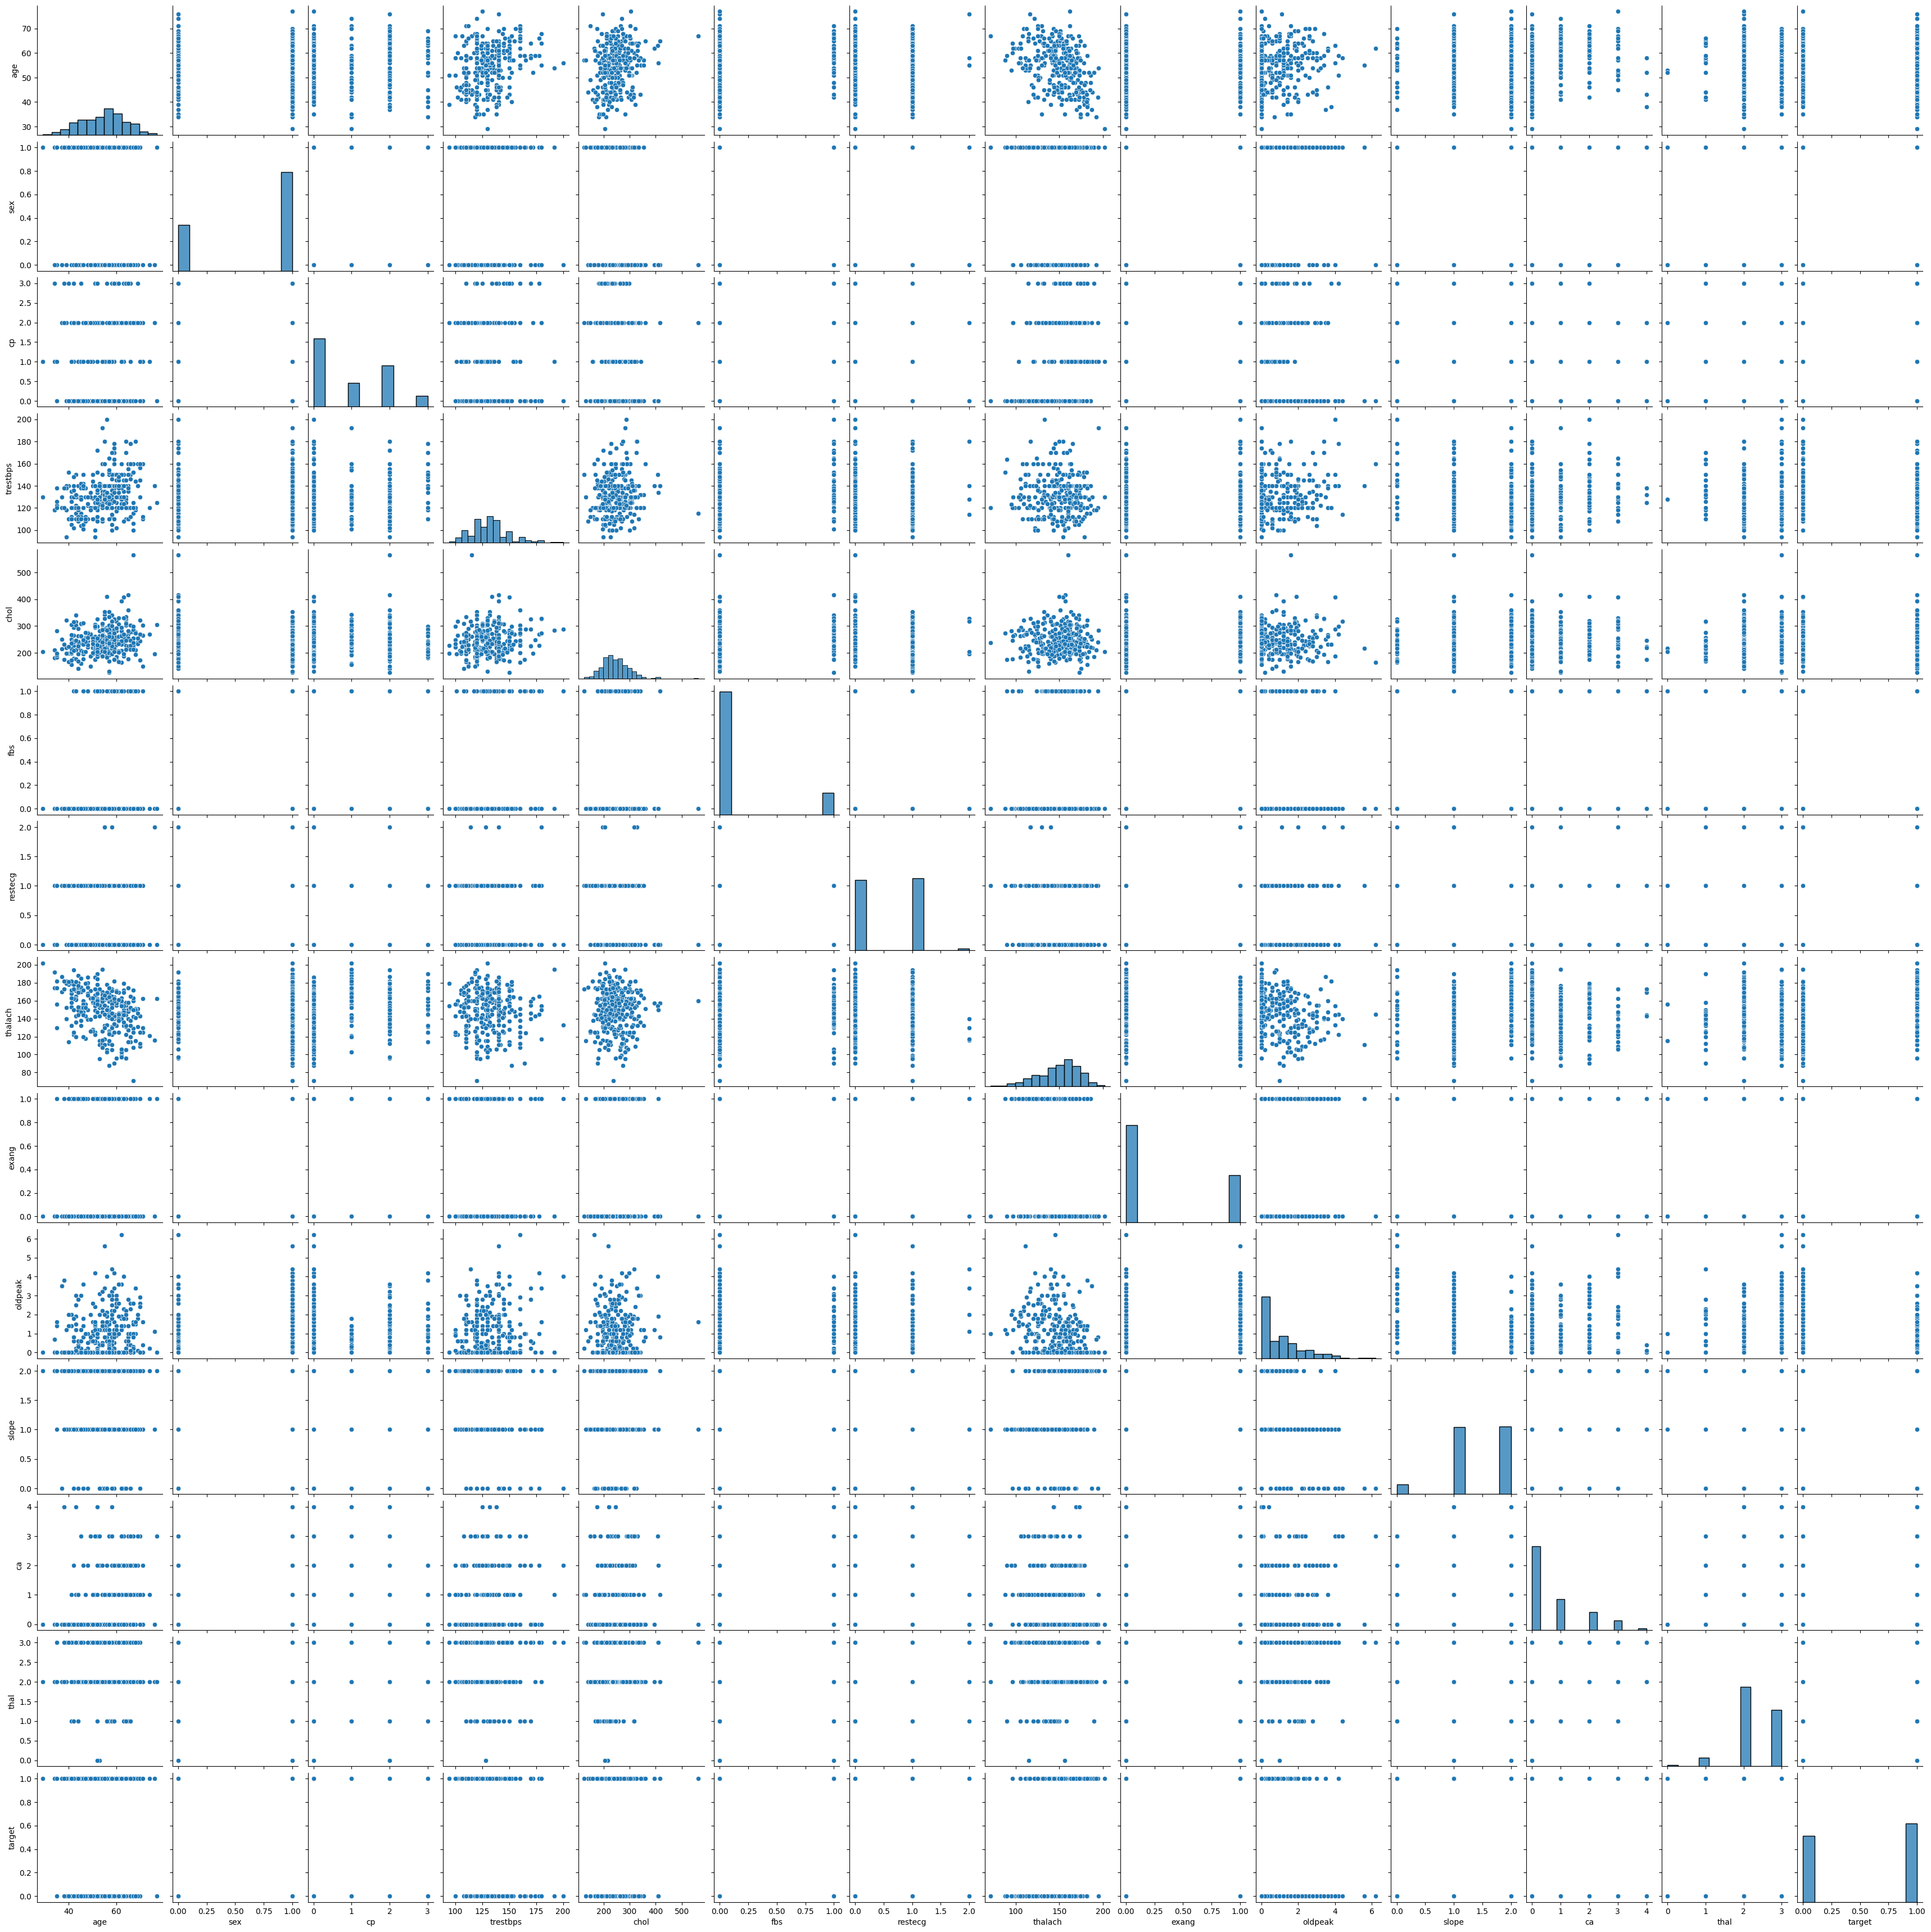

In [29]:
sns.pairplot(data=dataset)

<AxesSubplot: >

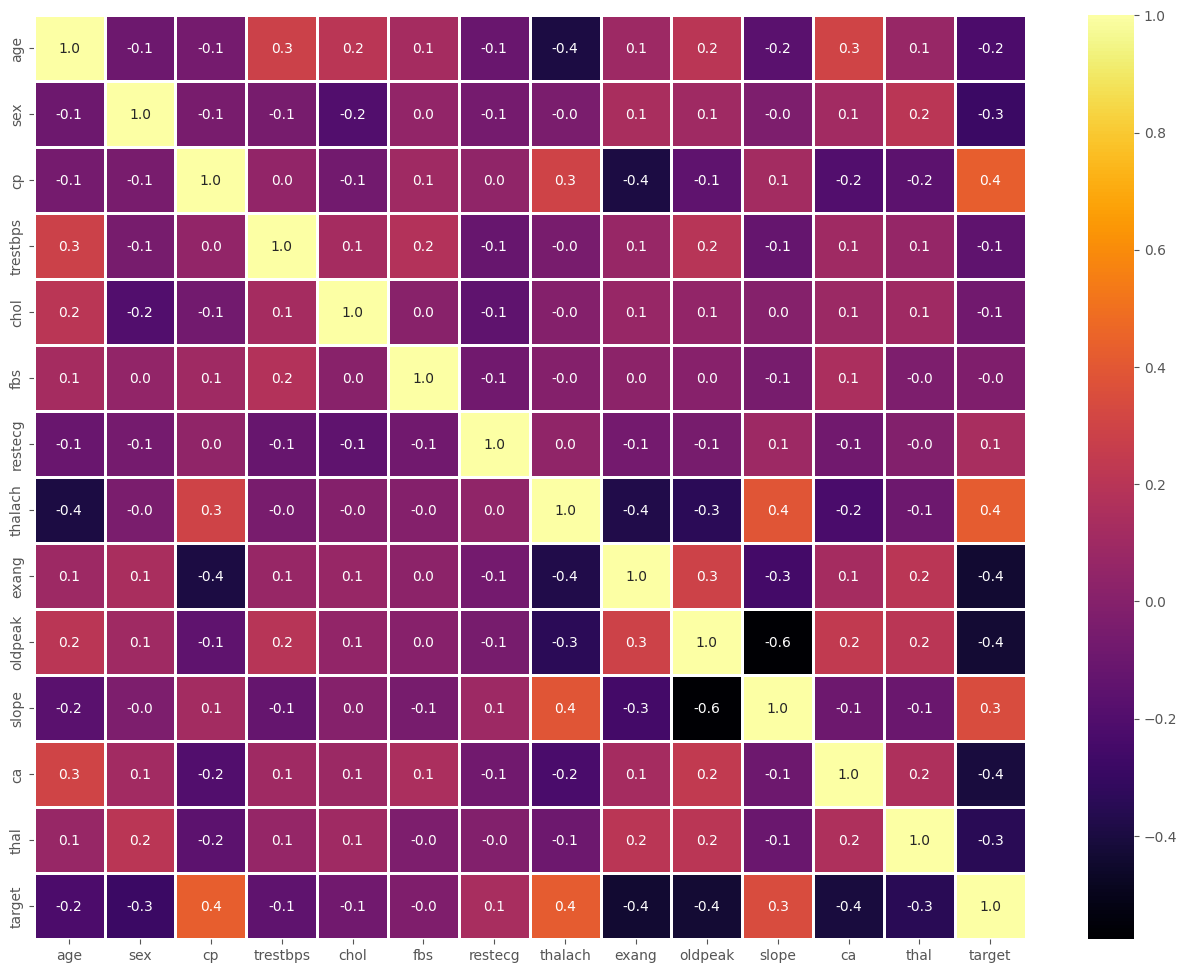

In [18]:
plt.figure(figsize=(16,12))
sns.heatmap(dataset.corr(),annot=True, fmt='.1f', linecolor='white',linewidths= 1.001,cmap='inferno')

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [20]:
y = dataset.pop('target')
X = dataset

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 4)

print('X_train:',X_train.shape)
print('X_test :',X_test.shape)
print('y_train:',y_train.shape)
print('y_test :',y_test.shape)

X_train: (211, 13)
X_test : (91, 13)
y_train: (211,)
y_test : (91,)


In [22]:
import statsmodels.api as sm
logreg = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.349166
         Iterations 7


In [23]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  211
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                           12
Date:                Sat, 10 Dec 2022   Pseudo R-squ.:                  0.4953
Time:                        10:42:26   Log-Likelihood:                -73.674
converged:                       True   LL-Null:                       -145.97
Covariance Type:            nonrobust   LLR p-value:                 7.087e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0359      0.025      1.443      0.149      -0.013       0.085
sex           -1.6155      0.527     -3.067      0.002      -2.648      -0.583
cp             0.7427      0.226      3.293      0.0

In [24]:
new_features  = logreg.pvalues[logreg.pvalues <= .6]
new_X = dataset[new_features.index]
new_X.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,0,150,0,2.3,0,0,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,172,0,1.4,2,0,2
3,56,1,1,120,236,1,178,0,0.8,2,0,2
4,57,0,0,120,354,1,163,1,0.6,2,0,2


In [25]:
new_features.index

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [26]:
X1_train, X1_test, y1_train, y1_test = train_test_split(new_X, y, test_size = 0.3, random_state=5)

print('X1_train:',X1_train.shape)
print('X1_test :',X1_test.shape)
print('y1_train:',y1_train.shape)
print('y1_test :',y1_test.shape)

X1_train: (211, 12)
X1_test : (91, 12)
y1_train: (211,)
y1_test : (91,)


In [27]:
logreg1 = sm.Logit(y1_train, X1_train).fit()

Optimization terminated successfully.
         Current function value: 0.334213
         Iterations 7


In [28]:
print(logreg1.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  211
Model:                          Logit   Df Residuals:                      199
Method:                           MLE   Df Model:                           11
Date:                Sat, 10 Dec 2022   Pseudo R-squ.:                  0.5144
Time:                        10:42:32   Log-Likelihood:                -70.519
converged:                       True   LL-Null:                       -145.21
Covariance Type:            nonrobust   LLR p-value:                 1.998e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0302      0.023      1.289      0.197      -0.016       0.076
sex           -1.7057      0.585     -2.918      0.004      -2.851      -0.560
cp             1.0425      0.238      4.388      0.0

In [29]:
new_features  = logreg1.pvalues[logreg1.pvalues <= .3]
new_X = dataset[new_features.index]
new_X.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,ca,thal
0,63,1,3,145,233,0,150,0,2.3,0,1
1,37,1,2,130,250,1,187,0,3.5,0,2
2,41,0,1,130,204,0,172,0,1.4,0,2
3,56,1,1,120,236,1,178,0,0.8,0,2
4,57,0,0,120,354,1,163,1,0.6,0,2


In [30]:
X2_train, X2_test, y2_train, y2_test = train_test_split(new_X, y, test_size = 0.3, random_state=5)

print('X2_train:',X2_train.shape)
print('X2_test :',X2_test.shape)
print('y2_train:',y2_train.shape)
print('y2_test :',y2_test.shape)

X2_train: (211, 11)
X2_test : (91, 11)
y2_train: (211,)
y2_test : (91,)


In [31]:
logreg2 = sm.Logit(y2_train, X2_train).fit()

Optimization terminated successfully.
         Current function value: 0.336456
         Iterations 7


In [32]:
print(logreg2.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  211
Model:                          Logit   Df Residuals:                      200
Method:                           MLE   Df Model:                           10
Date:                Sat, 10 Dec 2022   Pseudo R-squ.:                  0.5111
Time:                        10:42:40   Log-Likelihood:                -70.992
converged:                       True   LL-Null:                       -145.21
Covariance Type:            nonrobust   LLR p-value:                 7.840e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0326      0.023      1.400      0.161      -0.013       0.078
sex           -1.6789      0.580     -2.894      0.004      -2.816      -0.542
cp             1.0214      0.236      4.335      0.0